FFT demo of a signal in two ways:
a) naive way
b) windowing with DC treatment


In [16]:
from __future__ import division
from pylab import *

Given:

In [17]:
f_s = 100.0 # sampling frequency (Hz)
T = 3.0 # total actual sample time (s)
g = loadtxt('../../data/FFT_Example_data_with_window.txt')

In [18]:
for i in range(10):
	g += random(g.shape[0])

In [19]:
# Calculate
N = f_s*T  #total actual number of data points
del_t = 1./f_s  #(s)
del_f = 1./T  #(Hz)
f_fold = f_s/2.  #folding frequency = max frequency of FFT (Hz)
N_freq = N/2.  #number of discrete frequencies

In [20]:
t = arange(0.0,T+del_t,del_t)  #time, t (s)

In [21]:
g += 1.2*sin(2*pi*10*t)

In [22]:
frequency = arange(0,f_fold,del_f)  #frequency (Hz)
G = fft(g) # FFT 
Magnitude = abs(G)/(N/2.)  #|F|/(N/2)
Magnitude[0] = Magnitude[0]/2
len_loc, = Magnitude.shape
A = Magnitude[0:round(len_loc/2)]
Freq = frequency[0:round(len_loc/2)]

do it smart way

In [23]:
N_2 = 2**fix(log2(N)).astype('i4')  #total useful number of data points
T_2 = N_2/f_s  #total useful sample time (s)
del_f_2 = 1/T_2  #(Hz)
N_freq_2 = N_2/2  #number of useful discrete frequencies

In [24]:
t_2 = arange(0.0,T_2+del_t,del_t)  #time, t (s)
frequency_2 = arange(0,f_fold,del_f_2)  #frequency (Hz)
len2, = t_2.shape
DC_2 = mean(g[:len2-1])  #DC = mean value of input signal (V) (average of all the useful data)
g_uncoupled_2 = g[:len2-1]-DC_2  #uncoupled
u_Hann_2 = 0.5*(1-cos(2*pi*t_2[:-1]/T_2))  #u_Hanning(t)
g_Hann_2 = g_uncoupled_2*u_Hann_2  #g(t)*u_Hanning(t)
G_Hann_2 = fft(g_Hann_2,N_2)  #G(omega) with Hanning window
Magnitude_Hann_2 = abs(G_Hann_2)*sqrt(8./3.)/(N_2/2)  #|F|*sqrt(8/3)/(N/2)
Magnitude_Hann_2[0] = Magnitude_Hann_2[0]/2 + DC_2  #(also divide the first one by 2, and add back the DC value)

In [25]:
len_loc, = Magnitude_Hann_2.shape
A_2 = Magnitude_Hann_2[0:round(len_loc/2)]
Freq_2 = frequency_2[0:round(len_loc/2)]

([], <a list of 0 Text yticklabel objects>)

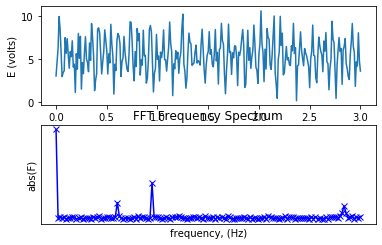

In [29]:
figure()
subplot(2,1,1)
plot(t,g)
xlabel('t (sec)')
ylabel('E (volts)')

subplot(2,1,2)
plot(frequency,Magnitude[:frequency.shape[0]],'b-x')
# plot(frequency_2,Magnitude_Hann_2[:frequency_2.shape[0]], 'r-s')
xlabel('frequency, (Hz)')
ylabel('abs(F)')
title('FFT Frequency Spectrum')
# legend(('Simple','Window + DC'))
xticks([])
yticks([])